In [1]:
pip install pyEDFlib numpy scipy pywt pandas tqdm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [91]:
pip install edfreader

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement edfreader (from versions: none)
ERROR: No matching distribution found for edfreader


In [1]:
import os
import pyedflib
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
from scipy.fft import fft
import pywt
from tqdm import tqdm  # For progress tracking

In [2]:
import mne


In [3]:
import warnings
warnings.simplefilter("ignore")

In [29]:
edf_folder = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"

In [51]:

edf = mne.io.read_raw_edf(r"C:\Users\chris\Downloads\sleep_edf_database_small_subject\ST7012J0-PSG.edf")
header = ','.join(edf.ch_names)
np.savetxt('your_csv_file.csv', edf.get_data().T, delimiter=',', header=header)

Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\ST7012J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\chris\AppData\Local\Temp\ipykernel_7636\3134835140.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  edf = mne.io.read_raw_edf(r"C:\Users\chris\Downloads\sleep_edf_database_small_subject\ST7012J0-PSG.edf")
C:\Users\chris\AppData\Local\Temp\ipykernel_7636\3134835140.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  edf = mne.io.read_raw_edf(r"C:\Users\chris\Downloads\sleep_edf_database_small_subject\ST7012J0-PSG.edf")


In [55]:
df = pd.read_csv("your_csv_file.csv")

In [57]:
df

,# EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker
0,1.177440e-04,1.177440e-04,1.177440e-04,1.177440e-04,-30.000000
1,1.177440e-04,1.177440e-04,1.177440e-04,1.177440e-04,-29.984429
2,1.177440e-04,1.177440e-04,1.177440e-04,1.177440e-04,-29.970352
3,1.177440e-04,1.177440e-04,1.177440e-04,1.177440e-04,-29.959152
4,1.177440e-04,1.177440e-04,1.177440e-04,1.177440e-04,-29.951930
...,...,...,...,...,...
3131995,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.050079
3131996,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.047676
3131997,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.040597
3131998,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.029526


In [65]:

# List all EDF files in the folder
edf_files = [f for f in os.listdir(edf_folder) if f.endswith(".edf")]

# Function to read and display EDF file information using MNE
def display_edf_info(file_path):
    """Read an EDF file and print its metadata and signal details using MNE."""
    raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)  # Do not load full data into memory

    # Extract metadata
    num_channels = len(raw.ch_names)
    sampling_rates = raw.info['sfreq']
    duration = raw.n_times / raw.info['sfreq']
    channel_labels = raw.ch_names

    # Print file details
    print("=" * 80)
    print(f" EDF File: {os.path.basename(file_path)}")
    print(f" Number of Channels: {num_channels}")
    print(f" Total Duration: {duration:.2f} sec")
    print(f" Sampling Rate: {sampling_rates} Hz")
    print("-" * 80)
    
    for i, ch in enumerate(channel_labels):
        print(f"🎛 Channel {i+1}: {ch}")

    print("=" * 80)
    print("\n")

#
print(f"🔍 Found {len(edf_files)} EDF files in '{edf_folder}'\n")

for file in tqdm(edf_files, desc="Processing EDF files"):
    file_path = os.path.join(edf_folder, file)
    display_edf_info(file_path)


🔍 Found 24 EDF files in 'C:\Users\chris\Downloads\sleep_edf_database_small_subject'



Processing EDF files: 100%|██████████| 24/24 [00:00<00:00, 348.59it/s]

📂 **EDF File**: SC4001E0-PSG (1).edf
📊 **Number of Channels**: 7
⏳ **Total Duration**: 79500.00 sec
⚡ **Sampling Rate**: 100.0 Hz
--------------------------------------------------------------------------------
🎛 **Channel 1:** EEG Fpz-Cz
🎛 **Channel 2:** EEG Pz-Oz
🎛 **Channel 3:** EOG horizontal
🎛 **Channel 4:** Resp oro-nasal
🎛 **Channel 5:** EMG submental
🎛 **Channel 6:** Temp rectal
🎛 **Channel 7:** Event marker


📂 **EDF File**: SC4001EC-Hypnogram.edf
📊 **Number of Channels**: 0
⏳ **Total Duration**: 1.00 sec
⚡ **Sampling Rate**: 2054.0 Hz
--------------------------------------------------------------------------------


📂 **EDF File**: SC4022E0-PSG.edf
📊 **Number of Channels**: 7
⏳ **Total Duration**: 82680.00 sec
⚡ **Sampling Rate**: 100.0 Hz
--------------------------------------------------------------------------------
🎛 **Channel 1:** EEG Fpz-Cz
🎛 **Channel 2:** EEG Pz-Oz
🎛 **Channel 3:** EOG horizontal
🎛 **Channel 4:** Resp oro-nasal
🎛 **Channel 5:** EMG submental
🎛 **Chann

In [77]:

# Pick the required channels
channels_to_include = ['EEG Fpz-Cz']
raw.pick_channels(channels_to_include)

# Create 30-second epochs
epoch_length = 30  # seconds
sfreq = raw.info['sfreq']  # Sampling frequency
tmin, tmax = 0, epoch_length  # Define epoch duration
events = mne.make_fixed_length_events(raw, duration=epoch_length)

# Create epochs object
epochs = mne.Epochs(raw, events, tmin=0, tmax=epoch_length, baseline=None, preload=True)

# Now you can analyze or save the epochs


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


ValueError: Missing channels from ch_names required by include:
['EEG Fpz-Cz']

In [73]:
print(raw.info["ch_names"])

[]


In [75]:
for ch in raw.info["ch_names"]:
    print(ch)

### not to be used for further processing

In [97]:
output_folder = "processed_eeg_data" 
# Define required EEG channels
required_channels = ['EEG Fpz-Cz', 'EEG Pz-Oz']

# Get all EDF files excluding hypnogram files
edf_files = [f for f in os.listdir(edf_folder) if f.endswith(".edf") and "hypnogram" not in f.lower()]

# Loop through all EDF files
for edf_file in tqdm(edf_files, desc="Processing EDF Files"):
    file_path = os.path.join(edf_folder, edf_file)
    
    # Load the EDF file
    edf_reader = pyedflib.EdfReader(file_path)
    
    # Get channel labels
    channel_labels = edf_reader.getSignalLabels()
    
    # Find indices of required channels
    channel_indices = [channel_labels.index(ch) for ch in required_channels if ch in channel_labels]
    
    if not channel_indices:
        print(f"Skipping {edf_file}: Required channels not found!")
        edf_reader.close()
        continue
    
    # Extract EEG signals
    eeg_signals = [edf_reader.readSignal(idx) for idx in channel_indices]
    eeg_signals = np.array(eeg_signals)  # Convert to NumPy array
    
    # Get sampling frequency
    sampling_rate = edf_reader.getSampleFrequencies()[channel_indices[0]]
    
    # Close the EDF file
    edf_reader.close()
    
    os.makedirs(output_folder, exist_ok=True)

    # Save as NPZ file
    save_path = os.path.join(output_folder, edf_file.replace(".edf", ".npz"))
    np.savez(save_path, eeg=eeg_signals, fs=sampling_rate, channels=required_channels)
    
    print(f"Processed and saved: {edf_file}")


Processing EDF Files:  10%|█         | 1/10 [00:00<00:08,  1.11it/s]

Processed and saved: SC4001E0-PSG (1).edf


Processing EDF Files:  20%|██        | 2/10 [00:01<00:07,  1.03it/s]

Processed and saved: SC4022E0-PSG.edf


Processing EDF Files:  30%|███       | 3/10 [00:02<00:07,  1.00s/it]

Processed and saved: SC4032E0-PSG.edf


Processing EDF Files:  40%|████      | 4/10 [00:03<00:04,  1.33it/s]

Processed and saved: ST7012J0-PSG.edf


Processing EDF Files:  50%|█████     | 5/10 [00:03<00:03,  1.45it/s]

Processed and saved: ST7081J0-PSG.edf


Processing EDF Files:  60%|██████    | 6/10 [00:04<00:02,  1.56it/s]

Processed and saved: ST7202J0-PSG.edf


Processing EDF Files:  70%|███████   | 7/10 [00:05<00:01,  1.54it/s]

Processed and saved: ST7221J0-PSG.edf


Processing EDF Files:  80%|████████  | 8/10 [00:05<00:01,  1.62it/s]

Processed and saved: ST7222J0-PSG.edf


Processing EDF Files:  90%|█████████ | 9/10 [00:06<00:00,  1.63it/s]

Processed and saved: ST7241J0-PSG.edf


Processing EDF Files: 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

Processed and saved: ST7242J0-PSG.edf


In [9]:
# Define epoch length in seconds
epoch_length = 30  # 30-second windows

# Calculate number of samples per epoch
samples_per_epoch = epoch_length * sampling_rate

# Ensure the data length is a multiple of epoch size
n_epochs = len(eeg_signals) // samples_per_epoch
eeg_signals = eeg_signals[:n_epochs * samples_per_epoch]  # Trim excess

# Reshape EEG data into (epochs, samples per epoch, channels)
eeg_epochs = eeg_signals.reshape(n_epochs, samples_per_epoch, -1)

# Save as NPZ file
save_path = os.path.join(output_folder, edf_file.replace(".edf", ".npz"))
np.savez(save_path, eeg=eeg_epochs, fs=sampling_rate, channels=required_channels)

print(f"Processed and saved: {edf_file} with {n_epochs} epochs.")


NameError: name 'sampling_rate' is not defined

In [13]:

output_folder = "processed_eeg_data"
os.makedirs(output_folder, exist_ok=True)

# Define required EEG channels
required_channels = ['EEG Fpz-Cz', 'EEG Pz-Oz']

def process_edf_file(edf_file):
    file_path = os.path.join(edf_folder, edf_file)
    
    # Load the EDF file
    edf_reader = pyedflib.EdfReader(file_path)
    
    # Get channel labels
    channel_labels = edf_reader.getSignalLabels()
    
    # Find indices of required channels
    channel_indices = [channel_labels.index(ch) for ch in required_channels if ch in channel_labels]
    
    if not channel_indices:
        print(f"Skipping {edf_file}: Required channels not found!")
        edf_reader.close()
        return
    
    # Extract EEG signals
    eeg_signals = np.array([edf_reader.readSignal(idx) for idx in channel_indices])  # Shape: (num_channels, num_samples)
    
    # Get sampling frequency
    sampling_rate = edf_reader.getSampleFrequencies()[channel_indices[0]]
    
    # Close the EDF file
    edf_reader.close()
    
    # Define epoch length in seconds
    epoch_length = 30  # 30-second epochs
    samples_per_epoch = int(epoch_length * sampling_rate)  # Total samples per epoch
    
    # Ensure EEG data length is a multiple of epoch size
    min_length = (eeg_signals.shape[1] // samples_per_epoch) * samples_per_epoch
    eeg_signals = eeg_signals[:, :min_length]  # Trim excess samples
    
    # Reshape EEG data into (epochs, samples_per_epoch, num_channels)
    eeg_epochs = eeg_signals.T.reshape(-1, samples_per_epoch, len(channel_indices))
    
    # Save as NPZ file
    save_path = os.path.join(output_folder, edf_file.replace(".edf", ".npz"))
    np.savez(save_path, eeg=eeg_epochs, fs=sampling_rate, channels=required_channels)
    
    print(f"Processed and saved: {edf_file} with {eeg_epochs.shape[0]} epochs.")

# Get all EDF files excluding hypnogram files
edf_files = [f for f in os.listdir(edf_folder) if f.endswith(".edf") and "hypnogram" not in f.lower()]

# Process each EDF file
for edf_file in tqdm(edf_files, desc="Processing EDF Files"):
    process_edf_file(edf_file)

Processing EDF Files:   6%|▌         | 1/18 [00:01<00:21,  1.24s/it]

Processed and saved: SC4001E0-PSG (1).edf with 2650 epochs.


Processing EDF Files:  11%|█         | 2/18 [00:02<00:21,  1.36s/it]

Processed and saved: SC4022E0-PSG.edf with 2756 epochs.


Processing EDF Files:  17%|█▋        | 3/18 [00:04<00:20,  1.38s/it]

Processed and saved: SC4032E0-PSG.edf with 2732 epochs.


Processing EDF Files:  22%|██▏       | 4/18 [00:05<00:17,  1.27s/it]

Processed and saved: SC4322E0-PSG.edf with 2616 epochs.


Processing EDF Files:  28%|██▊       | 5/18 [00:06<00:15,  1.21s/it]

Processed and saved: SC4452F0-PSG.edf with 2670 epochs.


Processing EDF Files:  33%|███▎      | 6/18 [00:07<00:14,  1.20s/it]

Processed and saved: SC4481F0-PSG.edf with 2880 epochs.


Processing EDF Files:  39%|███▉      | 7/18 [00:08<00:13,  1.19s/it]

Processed and saved: SC4522E0-PSG.edf with 2774 epochs.


Processing EDF Files:  44%|████▍     | 8/18 [00:09<00:09,  1.03it/s]

Processed and saved: ST7012J0-PSG.edf with 1044 epochs.


Processing EDF Files:  50%|█████     | 9/18 [00:09<00:07,  1.25it/s]

Processed and saved: ST7081J0-PSG.edf with 966 epochs.


Processing EDF Files:  56%|█████▌    | 10/18 [00:10<00:05,  1.41it/s]

Processed and saved: ST7101J0-PSG.edf with 1098 epochs.


Processing EDF Files:  61%|██████    | 11/18 [00:10<00:04,  1.54it/s]

Processed and saved: ST7111J0-PSG.edf with 1046 epochs.


Processing EDF Files:  67%|██████▋   | 12/18 [00:11<00:03,  1.63it/s]

Processed and saved: ST7152J0-PSG.edf with 1075 epochs.


Processing EDF Files:  72%|███████▏  | 13/18 [00:11<00:02,  1.67it/s]

Processed and saved: ST7182J0-PSG.edf with 1131 epochs.


Processing EDF Files:  78%|███████▊  | 14/18 [00:12<00:02,  1.75it/s]

Processed and saved: ST7202J0-PSG.edf with 1000 epochs.


Processing EDF Files:  83%|████████▎ | 15/18 [00:12<00:01,  1.76it/s]

Processed and saved: ST7221J0-PSG.edf with 1098 epochs.


Processing EDF Files:  89%|████████▉ | 16/18 [00:13<00:01,  1.84it/s]

Processed and saved: ST7222J0-PSG.edf with 958 epochs.


Processing EDF Files:  94%|█████████▍| 17/18 [00:13<00:00,  1.84it/s]

Processed and saved: ST7241J0-PSG.edf with 1087 epochs.


Processing EDF Files: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]

Processed and saved: ST7242J0-PSG.edf with 982 epochs.


In [15]:
print(f"Saving NPZ file to: {save_path}")

NameError: name 'save_path' is not defined

### information on the epocs, picks one specific subject

In [17]:
import numpy as np

# Load an NPZ file
data = np.load("processed_eeg_data\ST7242J0-PSG.npz")

# Extract EEG signals, sampling rate, and channels
eeg_signals = data["eeg"]  # EEG signal array (n_channels, n_samples)
sampling_rate = data["fs"]  # Sampling frequency
channels = data["channels"]  # Channel names

print("EEG Shape:", eeg_signals.shape)
print("Sampling Rate:", sampling_rate)
print("Channels:", channels)


EEG Shape: (982, 3000, 2)
Sampling Rate: 100.0
Channels: ['EEG Fpz-Cz' 'EEG Pz-Oz']


In [103]:
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Samples Per Epoch (30 sec): {samples_per_epoch}")

Sampling Rate: 100.0 Hz
Samples Per Epoch (30 sec): 3000.0


In [23]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define path
data_folder = "processed_eeg_data"
epoch_length = 30  # 30 seconds

# Load all NPZ files
X, y = [], []
for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_signals = data["eeg"]  # Shape: (n_channels, n_samples)
        sampling_rate = data["fs"]  # Sampling frequency

        # Convert signals into 30-second epochs
        samples_per_epoch = int(sampling_rate * epoch_length)
        num_epochs = eeg_signals.shape[1] // samples_per_epoch

        # Reshape into epochs: (n_epochs, n_channels, samples_per_epoch)
        eeg_epochs = eeg_signals[:, :num_epochs * samples_per_epoch].reshape(num_epochs, eeg_signals.shape[0], samples_per_epoch)
        
        # Use power spectral density as features (example)
        features = np.mean(eeg_epochs, axis=2)  # Average per channel
        X.append(features)
        
        # Dummy Labels (replace with actual labels if available)
        y.append(np.random.randint(0, 2, size=(num_epochs,)))  # Example binary labels

        # Calculate number of full epochs
        total_samples = eeg_signals.shape[1]  # Total number of samples
        samples_per_epoch = int(sampling_rate * epoch_length)  # Samples per 30 seconds
        num_epochs = total_samples // samples_per_epoch  # Number of complete 30s epochs

        print(f"Total Samples: {total_samples}")
        print(f"Samples per Epoch: {samples_per_epoch}")
        print(f"Number of Full Epochs: {num_epochs}")

if num_epochs > 0:
    eeg_epochs = eeg_signals[:, :num_epochs * samples_per_epoch]
    eeg_epochs = eeg_epochs.reshape(num_epochs, eeg_signals.shape[0], samples_per_epoch)
else:
    print(f"Skipping {edf_file} due to insufficient data for 30s epochs.")
    continue


# Convert lists to arrays
X = np.vstack(X)
y = np.hstack(y)


ValueError: cannot reshape array of size 15900000 into shape (1,2650,3000)

In [ ]:
#mean and variable values for machine learning models

In [25]:
def extract_features(eeg_epochs):
    mean_val = np.mean(eeg_epochs, axis=2)
    var_val = np.var(eeg_epochs, axis=2)
    return np.hstack([mean_val, var_val])  # Concatenating features

X = extract_features(X.reshape(-1, eeg_signals.shape[0], samples_per_epoch))


AttributeError: 'list' object has no attribute 'reshape'

In [27]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


In [121]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

# Function to load EDF files and corresponding hypnograms
def load_data(data_dir, subject_ids=None):
    """
    Load PSG recordings and hypnograms from EDF files.
    
    Parameters:
    data_dir (str): Directory containing the EDF files
    subject_ids (list): List of subject IDs to load. If None, load all.
    
    Returns:
    dict: Dictionary with subject IDs as keys and tuples of (raw_psg, hypnogram) as values
    """
    data = {}
    
    # If no subject IDs are provided, get all EDF files in the directory
    if subject_ids is None:
        psg_files = [f for f in os.listdir(data_dir) if f.endswith('.edf') and not f.endswith('_hypnogram.edf')]
        subject_ids = [os.path.splitext(f)[0] for f in psg_files]
    
    for subject_id in subject_ids:
        try:
            # Load PSG recording
            psg_file = os.path.join(data_dir, f"{subject_id}.edf")
            raw_psg = mne.io.read_raw_edf(psg_file, preload=True)
            
            # Load hypnogram
            hypnogram_file = os.path.join(data_dir, f"{subject_id}_hypnogram.edf")
            # There are multiple ways hypnograms might be stored, this is a common format
            # You might need to adapt this depending on your specific dataset
            annotations = mne.read_annotations(hypnogram_file)
            
            data[subject_id] = (raw_psg, annotations)
            print(f"Loaded data for subject {subject_id}")
        except Exception as e:
            print(f"Error loading data for subject {subject_id}: {e}")
    
    return data

# Function to extract features from PSG recordings
def extract_features(raw_psg, annotations, epoch_duration=30.0):
    """
    Extract features from PSG recordings for each sleep stage.
    
    Parameters:
    raw_psg (mne.io.Raw): MNE Raw object containing PSG data
    annotations (mne.Annotations): Annotations containing sleep stages
    epoch_duration (float): Duration of each epoch in seconds
    
    Returns:
    X (np.array): Features array
    y (np.array): Labels array (sleep stages)
    """
    # Define sleep stage mapping (adapt to your dataset's annotation system)
    stage_mapping = {
        'Sleep stage W': 0,  # Wake
        'Sleep stage 1': 1,  # N1
        'Sleep stage 2': 2,  # N2
        'Sleep stage 3': 3,  # N3
        'Sleep stage 4': 3,  # N3 (some datasets separate N3 and N4)
        'Sleep stage R': 4,  # REM
    }
    
    # Get sampling frequency
    sfreq = raw_psg.info['sfreq']
    
    # Pick EEG channels (modify based on your dataset)
    eeg_channels = mne.pick_types(raw_psg.info, eeg=True)
    
    # Extract epochs
    epochs = []
    labels = []
    
    for annot in annotations:
        if annot['description'] in stage_mapping:
            # Get start and end of the annotation
            start = annot['onset']
            end = start + annot['duration']
            
            # Extract data for this epoch
            start_idx = int(start * sfreq)
            end_idx = int(end * sfreq)
            
            if end_idx <= raw_psg.n_times:  # Make sure we don't go out of bounds
                # Get data from EEG channels for this epoch
                data, times = raw_psg[eeg_channels, start_idx:end_idx]
                
                # Extract features (here we use simple time-domain features, you can extend this)
                features = []
                for channel_data in data:
                    # Time domain features
                    features.extend([
                        np.mean(channel_data),           # Mean
                        np.std(channel_data),            # Standard deviation
                        np.percentile(channel_data, 75), # 75th percentile
                        np.percentile(channel_data, 25), # 25th percentile
                        np.max(channel_data),            # Maximum value
                        np.min(channel_data),            # Minimum value
                        np.median(channel_data),         # Median
                        np.mean(np.abs(channel_data)),   # Mean absolute value
                        
                        # You can add frequency domain features using FFT here
                    ])
                
                epochs.append(features)
                labels.append(stage_mapping[annot['description']])
    
    X = np.array(epochs)
    y = np.array(labels)
    
    return X, y

# Function to prepare data for CNN
def prepare_cnn_data(raw_psg, annotations, epoch_duration=30.0):
    """
    Prepare data for CNN by extracting raw signals as features.
    
    Parameters:
    raw_psg (mne.io.Raw): MNE Raw object containing PSG data
    annotations (mne.Annotations): Annotations containing sleep stages
    epoch_duration (float): Duration of each epoch in seconds
    
    Returns:
    X (np.array): Features array with shape (n_samples, n_channels, n_timepoints)
    y (np.array): Labels array (sleep stages)
    """
    # Define sleep stage mapping (adapt to your dataset's annotation system)
    stage_mapping = {
        'Sleep stage W': 0,  # Wake
        'Sleep stage 1': 1,  # N1
        'Sleep stage 2': 2,  # N2
        'Sleep stage 3': 3,  # N3
        'Sleep stage 4': 3,  # N3 (some datasets separate N3 and N4)
        'Sleep stage R': 4,  # REM
    }
    
    # Get sampling frequency
    sfreq = raw_psg.info['sfreq']
    
    # Pick EEG channels (modify based on your dataset)
    eeg_channels = mne.pick_types(raw_psg.info, eeg=True)
    
    # Calculate samples per epoch
    samples_per_epoch = int(epoch_duration * sfreq)
    
    # We might need to downsample for CNN
    target_samples = 3000  # Target number of samples per epoch
    downsample_factor = max(1, int(samples_per_epoch / target_samples))
    
    # Extract epochs
    epochs = []
    labels = []
    
    for annot in annotations:
        if annot['description'] in stage_mapping:
            # Get start and end of the annotation
            start = annot['onset']
            end = start + annot['duration']
            
            # Extract data for this epoch
            start_idx = int(start * sfreq)
            end_idx = int(end * sfreq)
            
            if end_idx <= raw_psg.n_times:  # Make sure we don't go out of bounds
                # Get data from EEG channels for this epoch
                data, times = raw_psg[eeg_channels, start_idx:end_idx]
                
                # Downsample if needed
                if downsample_factor > 1:
                    data = data[:, ::downsample_factor]
                
                # Ensure fixed length
                if data.shape[1] > target_samples:
                    data = data[:, :target_samples]
                elif data.shape[1] < target_samples:
                    # Pad with zeros if too short
                    padding = np.zeros((data.shape[0], target_samples - data.shape[1]))
                    data = np.hstack((data, padding))
                
                epochs.append(data)
                labels.append(stage_mapping[annot['description']])
    
    # Stack all epochs
    X = np.array(epochs)
    y = np.array(labels)
    
    # Reshape for CNN: (samples, timesteps, channels)
    X = X.transpose(0, 2, 1)
    
    return X, y

# SVM model training and evaluation
def train_evaluate_svm(X_train, y_train, X_test, y_test):
    """
    Train and evaluate SVM model for sleep stage classification.
    
    Parameters:
    X_train, y_train: Training data
    X_test, y_test: Testing data
    
    Returns:
    model: Trained SVM model
    accuracy: Test accuracy
    """
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train SVM
    print("Training SVM model...")
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
    svm_model.fit(X_train_scaled, y_train)
    
    # Evaluate
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"SVM Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('SVM Confusion Matrix')
    plt.show()
    
    return svm_model, accuracy

# CNN model building, training and evaluation
def build_train_evaluate_cnn(X_train, y_train, X_test, y_test, n_classes=5):
    """
    Build, train and evaluate CNN model for sleep stage classification.
    
    Parameters:
    X_train, y_train: Training data
    X_test, y_test: Testing data
    n_classes: Number of sleep stage classes
    
    Returns:
    model: Trained CNN model
    accuracy: Test accuracy
    """
    # One-hot encode labels
    y_train_cat = to_categorical(y_train, n_classes)
    y_test_cat = to_categorical(y_test, n_classes)
    
    # Get input shape
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # Build CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=50, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=8),
        Dropout(0.2),
        
        Conv1D(filters=128, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=4),
        Dropout(0.2),
        
        Conv1D(filters=128, kernel_size=8, activation='relu'),
        MaxPooling1D(pool_size=4),
        Dropout(0.2),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Print model summary
    model.summary()
    
    # Train model
    print("\nTraining CNN model...")
    history = model.fit(
        X_train, y_train_cat,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )
    
    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test_cat)
    print(f"\nCNN Test Accuracy: {accuracy:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Confusion matrix
    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('CNN Confusion Matrix')
    plt.show()
    
    return model, accuracy

# Main execution
def main():
    # Set parameters
    data_dir = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"  # Replace with your data directory
    test_size = 0.2
    random_state = 42
    
    # Load data
    print("Loading data...")
    subject_data = load_data(data_dir)
    
    # Prepare data for SVM
    print("\nExtracting features for SVM...")
    X_all_svm = []
    y_all_svm = []
    
    for subject_id, (raw_psg, annotations) in subject_data.items():
        X, y = extract_features(raw_psg, annotations)
        X_all_svm.append(X)
        y_all_svm.append(y)
    
    X_all_svm = np.vstack(X_all_svm)
    y_all_svm = np.concatenate(y_all_svm)
    
    # Split data for SVM
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
        X_all_svm, y_all_svm, test_size=test_size, random_state=random_state, stratify=y_all_svm
    )
    
    # Train and evaluate SVM
    svm_model, svm_accuracy = train_evaluate_svm(X_train_svm, y_train_svm, X_test_svm, y_test_svm)
    
    # Prepare data for CNN
    print("\nPreparing data for CNN...")
    X_all_cnn = []
    y_all_cnn = []
    
    for subject_id, (raw_psg, annotations) in subject_data.items():
        X, y = prepare_cnn_data(raw_psg, annotations)
        X_all_cnn.append(X)
        y_all_cnn.append(y)
    
    X_all_cnn = np.vstack(X_all_cnn)
    y_all_cnn = np.concatenate(y_all_cnn)
    
    # Split data for CNN
    X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
        X_all_cnn, y_all_cnn, test_size=test_size, random_state=random_state, stratify=y_all_cnn
    )
    
    # Train and evaluate CNN
    cnn_model, cnn_accuracy = build_train_evaluate_cnn(X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn)
    
    # Compare results
    print("\nModel Comparison:")
    print(f"SVM Accuracy: {svm_accuracy:.4f}")
    print(f"CNN Accuracy: {cnn_accuracy:.4f}")
    
    # Save models if needed
    # svm_model_filename = 'svm_sleep_stage_model.joblib'
    # joblib.dump(svm_model, svm_model_filename)
    # cnn_model.save('cnn_sleep_stage_model.h5')

if __name__ == "__main__":
    main()

Loading data...
Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4001E0-PSG (1).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
Error loading data for subject SC4001E0-PSG (1): fname does not exist: "C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4001E0-PSG (1)_hypnogram.edf"
Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4001EC-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2053  =      0.000 ...     1.000 secs...
Error loading data for subject SC4001EC-Hypnogram: fname does not exist: "C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4001EC-Hypnogram_hypnogram.edf"
Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4022E0-PSG.edf...
EDF file detected
Setting channel info s

ValueError: need at least one array to concatenate

In [123]:
def parse_hypnogram(hypnogram_file):
    """
    Parse the hypnogram file to extract sleep stage annotations.
    
    Parameters:
    hypnogram_file (str): Path to the hypnogram EDF file
    
    Returns:
    mne.Annotations: Annotations containing sleep stages
    """
    try:
        # Method 1: If hypnogram is stored as annotations in an EDF file
        annotations = mne.read_annotations(hypnogram_file)
        return annotations
    except:
        try:
            # Method 2: If hypnogram is stored as a regular EDF file with a data channel
            raw_hypno = mne.io.read_raw_edf(hypnogram_file, preload=True)
            
            # Get the hypnogram data - usually there's only one channel
            hypno_data = raw_hypno.get_data()[0]
            
            # Create annotations from the hypnogram data
            # Each value in hypno_data represents a sleep stage
            # You'll need to determine the epoch length (usually 30 seconds)
            epoch_length = 30.0  # in seconds
            
            # Create empty annotations
            annotations = mne.Annotations(
                onset=[],
                duration=[],
                description=[]
            )
            
            # Map numeric values to sleep stage descriptions
            stage_mapping = {
                0: 'Sleep stage W',   # Wake
                1: 'Sleep stage 1',   # N1
                2: 'Sleep stage 2',   # N2
                3: 'Sleep stage 3',   # N3
                4: 'Sleep stage 4',   # N4 (if applicable)
                5: 'Sleep stage R'    # REM
            }
            
            # Create annotation for each epoch
            for i, stage in enumerate(hypno_data):
                # Map the numeric stage to a description
                if int(stage) in stage_mapping:
                    onset = i * epoch_length
                    annotations.append(
                        onset=onset,
                        duration=epoch_length,
                        description=stage_mapping[int(stage)]
                    )
            
            return annotations
        except Exception as e:
            print(f"Error parsing hypnogram: {e}")
            return None

In [125]:
def map_annotations_to_classes(annotations):
    """
    Map annotation descriptions to numerical classes.
    
    Parameters:
    annotations (mne.Annotations): Annotations containing sleep stages
    
    Returns:
    tuple: (onsets, durations, stages) where stages are numerical classes
    """
    # Define the mapping from text descriptions to numerical classes
    stage_mapping = {
        'Sleep stage W': 0,  # Wake
        'Sleep stage 1': 1,  # N1
        'Sleep stage 2': 2,  # N2
        'Sleep stage 3': 3,  # N3
        'Sleep stage 4': 3,  # N3/N4 combined
        'Sleep stage R': 4,  # REM
        
        # Alternative notation sometimes used
        'W': 0,
        'N1': 1,
        'N2': 2,
        'N3': 3,
        'N4': 3,
        'REM': 4
    }
    
    onsets = []
    durations = []
    stages = []
    
    for onset, duration, description in zip(
        annotations.onset, 
        annotations.duration, 
        annotations.description
    ):
        if description in stage_mapping:
            onsets.append(onset)
            durations.append(duration)
            stages.append(stage_mapping[description])
    
    return onsets, durations, stages

In [129]:
def extract_features_from_aligned_data(aligned_data):
    """
    Extract features from aligned data segments.
    
    Parameters:
    aligned_data (list): List of (data_segment, stage_label) tuples
    
    Returns:
    tuple: (X, y) features and labels
    """
    X = []
    y = []
    
    for data, stage in aligned_data:
        # Extract features from each segment
        features = []
        
        for channel_data in data:
            # Time domain features
            features.extend([
                np.mean(channel_data),           # Mean
                np.std(channel_data),            # Standard deviation
                np.percentile(channel_data, 75), # 75th percentile
                np.percentile(channel_data, 25), # 25th percentile
                np.max(channel_data),            # Maximum value
                np.min(channel_data),            # Minimum value
                np.median(channel_data),         # Median
                np.mean(np.abs(channel_data)),   # Mean absolute value
                
                # Frequency domain features using FFT
                *compute_band_powers(channel_data, sfreq=raw_psg.info['sfreq'])
            ])
        
        X.append(features)
        y.append(stage)
    
    return np.array(X), np.array(y)

def compute_band_powers(signal, sfreq):
    """
    Compute power in different frequency bands.
    
    Parameters:
    signal (array): Signal data
    sfreq (float): Sampling frequency
    
    Returns:
    list: Power in different frequency bands
    """
    from scipy import signal as sg
    
    # Define frequency bands
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 45)
    }
    
    # Compute power spectral density
    freqs, psd = sg.welch(signal, sfreq, nperseg=int(sfreq * 2))
    
    # Compute power in each band
    powers = []
    for band_name, (low, high) in bands.items():
        idx_band = np.logical_and(freqs >= low, freqs <= high)
        powers.append(np.sum(psd[idx_band]))
    
    return powers

In [1]:
import os
import numpy as np
import pyedflib
from tqdm import tqdm

# Define input folder and output folder
edf_folder = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"  
output_folder = "processed_eeg_data"
os.makedirs(output_folder, exist_ok=True)

# Define required EEG channels
required_channels = ['EEG Fpz-Cz', 'EEG Pz-Oz']  # Modify as needed

# Get all EDF files (excluding hypnograms)
edf_files = [f for f in os.listdir(edf_folder) if f.endswith(".edf") and "hypnogram" not in f.lower()]

# Function to load hypnogram annotations
def load_hypnogram(hypnogram_file):
    """ Load sleep stage labels from hypnogram EDF file """
    try:
        hypnogram_reader = pyedflib.EdfReader(hypnogram_file)
        annotations = hypnogram_reader.readAnnotations()
        hypnogram_reader.close()

        # Extract sleep stages & timestamps
        times, durations, labels = annotations
        
        # Convert labels to integer sleep stages (modify mapping as needed)
        stage_map = {"W": 0, "N1": 1, "N2": 2, "N3": 3, "R": 4}  # Wake, N1, N2, N3, REM
        numeric_labels = []
        
        for label in labels:
            if label in stage_map:
                numeric_labels.append(stage_map[label])
            else:
                numeric_labels.append(-1)  # Unknown stage

        return np.array(times), np.array(durations), np.array(numeric_labels)
    
    except Exception as e:
        print(f"Error loading hypnogram: {hypnogram_file} -> {e}")
        return None, None, None

# Process each EEG EDF file
for edf_file in tqdm(edf_files, desc="Processing EEG Files"):
    file_path = os.path.join(edf_folder, edf_file)
    
    # Find corresponding hypnogram file
    hypnogram_file = file_path.replace(".edf", "-Hypnogram.edf")  # Adjust naming if different
    if not os.path.exists(hypnogram_file):
        print(f"Skipping {edf_file}: Hypnogram file not found!")
        continue
    
    # Load EEG file
    edf_reader = pyedflib.EdfReader(file_path)
    channel_labels = edf_reader.getSignalLabels()
    
    # Get required EEG channel indices
    channel_indices = [channel_labels.index(ch) for ch in required_channels if ch in channel_labels]
    
    if not channel_indices:
        print(f"Skipping {edf_file}: Required EEG channels not found!")
        edf_reader.close()
        continue
    
    # Extract EEG signals
    eeg_signals = [edf_reader.readSignal(idx) for idx in channel_indices]
    eeg_signals = np.array(eeg_signals)
    
    # Get sampling frequency
    sampling_rate = int(edf_reader.getSampleFrequencies()[channel_indices[0]])

    # Close EEG EDF file
    edf_reader.close()

    # Load hypnogram labels
    times, durations, labels = load_hypnogram(hypnogram_file)
    if times is None:
        print(f"Skipping {edf_file}: Hypnogram could not be loaded.")
        continue

    # Compute number of samples per 30s epoch
    samples_per_epoch = sampling_rate * 30
    num_epochs = eeg_signals.shape[1] // samples_per_epoch

    # Initialize label array for each epoch
    epoch_labels = np.full(num_epochs, -1)  # Default unknown label

    # Assign labels to epochs based on hypnogram
    for i, (t, d, stage) in enumerate(zip(times, durations, labels)):
        start_epoch = int(t // 30)  # Convert timestamp to epoch index
        duration_epochs = int(d // 30)  # Convert duration to epochs
        epoch_labels[start_epoch:start_epoch + duration_epochs] = stage

    # Reshape EEG into epochs (n_epochs, n_channels, samples_per_epoch)
    eeg_epochs = eeg_signals[:, :num_epochs * samples_per_epoch].reshape(num_epochs, len(channel_indices), samples_per_epoch)

    # Save processed data
    save_path = os.path.join(output_folder, edf_file.replace(".edf", ".npz"))
    np.savez(save_path, eeg=eeg_epochs, labels=epoch_labels, fs=sampling_rate, channels=required_channels)
    
    print(f"Processed and saved: {edf_file}")

print("All EEG files have been processed successfully.")


Processing EEG Files: 100%|██████████| 10/10 [00:00<00:00, 9573.85it/s]

Skipping SC4001E0-PSG (1).edf: Hypnogram file not found!
Skipping SC4022E0-PSG.edf: Hypnogram file not found!
Skipping SC4032E0-PSG.edf: Hypnogram file not found!
Skipping ST7012J0-PSG.edf: Hypnogram file not found!
Skipping ST7081J0-PSG.edf: Hypnogram file not found!
Skipping ST7202J0-PSG.edf: Hypnogram file not found!
Skipping ST7221J0-PSG.edf: Hypnogram file not found!
Skipping ST7222J0-PSG.edf: Hypnogram file not found!
Skipping ST7241J0-PSG.edf: Hypnogram file not found!
Skipping ST7242J0-PSG.edf: Hypnogram file not found!
All EEG files have been processed successfully.


In [5]:
import os
import numpy as np
import pyedflib
from tqdm import tqdm

# Define input and output folders
#edf_folder = "edf_files"  # Change to your actual path
output_folder = "processed_eeg_data"
os.makedirs(output_folder, exist_ok=True)

# Define required EEG channels
required_channels = ['EEG Fpz-Cz', 'EEG Pz-Oz']  # Modify based on dataset

# Get all EEG PSG files
psg_files = [f for f in os.listdir(edf_folder) if f.endswith("-PSG.edf")]

# Sleep stage mapping (modify if needed)
stage_map = {"W": 0, "N1": 1, "N2": 2, "N3": 3, "R": 4}  # Wake, NREM1, NREM2, NREM3, REM

# Function to load hypnogram annotations
def load_hypnogram(hypnogram_file):
    """ Load sleep stage labels from hypnogram EDF file """
    try:
        hypnogram_reader = pyedflib.EdfReader(hypnogram_file)
        annotations = hypnogram_reader.readAnnotations()
        hypnogram_reader.close()

        # Extract sleep stages & timestamps
        times, durations, labels = annotations
        
        # Convert labels to integer sleep stages
        numeric_labels = []
        for label in labels:
            numeric_labels.append(stage_map.get(label, -1))  # Default to -1 for unknown labels

        return np.array(times), np.array(durations), np.array(numeric_labels)
    
    except Exception as e:
        print(f"Error loading hypnogram: {hypnogram_file} -> {e}")
        return None, None, None

# Process each EEG PSG file
for psg_file in tqdm(psg_files, desc="Processing EEG Files"):
    file_path = os.path.join(edf_folder, psg_file)

    # Find corresponding hypnogram file
    hypnogram_file = file_path.replace("-PSG.edf", "-Hypnogram.edf")
    if not os.path.exists(hypnogram_file):
        print(f"Skipping {psg_file}: Hypnogram file not found!")
        continue

    # Load EEG file
    edf_reader = pyedflib.EdfReader(file_path)
    channel_labels = edf_reader.getSignalLabels()
    
    # Get required EEG channel indices
    channel_indices = [channel_labels.index(ch) for ch in required_channels if ch in channel_labels]
    
    if not channel_indices:
        print(f"Skipping {psg_file}: Required EEG channels not found!")
        edf_reader.close()
        continue
    
    # Extract EEG signals
    eeg_signals = [edf_reader.readSignal(idx) for idx in channel_indices]
    eeg_signals = np.array(eeg_signals)
    
    # Get sampling frequency
    sampling_rate = int(edf_reader.getSampleFrequencies()[channel_indices[0]])

    # Close EEG EDF file
    edf_reader.close()

    # Load hypnogram labels
    times, durations, labels = load_hypnogram(hypnogram_file)
    if times is None:
        print(f"Skipping {psg_file}: Hypnogram could not be loaded.")
        continue

    # Compute number of samples per 30s epoch
    samples_per_epoch = sampling_rate * 30
    num_epochs = eeg_signals.shape[1] // samples_per_epoch

    # Initialize label array for each epoch
    epoch_labels = np.full(num_epochs, -1)  # Default unknown label

    # Assign labels to epochs based on hypnogram
    for i, (t, d, stage) in enumerate(zip(times, durations, labels)):
        start_epoch = int(t // 30)  # Convert timestamp to epoch index
        duration_epochs = int(d // 30)  # Convert duration to epochs
        epoch_labels[start_epoch:start_epoch + duration_epochs] = stage

    # Reshape EEG into epochs (n_epochs, n_channels, samples_per_epoch)
    eeg_epochs = eeg_signals[:, :num_epochs * samples_per_epoch].reshape(num_epochs, len(channel_indices), samples_per_epoch)

    # Save processed data
    save_path = os.path.join(output_folder, psg_file.replace("-PSG.edf", ".npz"))
    np.savez(save_path, eeg=eeg_epochs, labels=epoch_labels, fs=sampling_rate, channels=required_channels)
    
    print(f"Processed and saved: {psg_file}")

print("All EEG files have been processed successfully.")


Processing EEG Files: 100%|██████████| 9/9 [00:00<00:00, 9037.28it/s]

Skipping SC4022E0-PSG.edf: Hypnogram file not found!
Skipping SC4032E0-PSG.edf: Hypnogram file not found!
Skipping ST7012J0-PSG.edf: Hypnogram file not found!
Skipping ST7081J0-PSG.edf: Hypnogram file not found!
Skipping ST7202J0-PSG.edf: Hypnogram file not found!
Skipping ST7221J0-PSG.edf: Hypnogram file not found!
Skipping ST7222J0-PSG.edf: Hypnogram file not found!
Skipping ST7241J0-PSG.edf: Hypnogram file not found!
Skipping ST7242J0-PSG.edf: Hypnogram file not found!
All EEG files have been processed successfully.


### description of all the channels

In [11]:
import os
edf_folder = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"    # Update if needed
all_files = os.listdir(edf_folder)

psg_files = [f for f in all_files if "-PSG.edf" in f]
hypnogram_files = [f for f in all_files if "-Hypnogram.edf" in f]

print("PSG Files:", psg_files)
print("Hypnogram Files:", hypnogram_files)


PSG Files: ['SC4022E0-PSG.edf', 'SC4032E0-PSG.edf', 'ST7012J0-PSG.edf', 'ST7081J0-PSG.edf', 'ST7202J0-PSG.edf', 'ST7221J0-PSG.edf', 'ST7222J0-PSG.edf', 'ST7241J0-PSG.edf', 'ST7242J0-PSG.edf']
Hypnogram Files: ['SC4001EC-Hypnogram.edf', 'SC4022EJ-Hypnogram.edf', 'SC4032EP-Hypnogram.edf', 'SC4081EC-Hypnogram.edf', 'SC4091EC-Hypnogram.edf', 'SC4101EC-Hypnogram.edf', 'ST7011JP-Hypnogram.edf', 'ST7012JP-Hypnogram.edf', 'ST7081JW-Hypnogram.edf', 'ST7222JA-Hypnogram.edf', 'ST7241JO-Hypnogram.edf', 'ST7242JO-Hypnogram.edf']


In [13]:
import os

edf_folder = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"  # Update this to the correct folder

# Get all files
all_files = os.listdir(edf_folder)

# Extract PSG and Hypnogram file lists
psg_files = [f for f in all_files if f.endswith("-PSG.edf")]
hypnogram_files = [f for f in all_files if f.endswith("-Hypnogram.edf")]

# Extract subject IDs from PSG files (before the first hyphen "-")
psg_subjects = {f.split("-")[0]: f for f in psg_files}
hypnogram_subjects = {f.split("-")[0]: f for f in hypnogram_files}

# Find matching PSG & Hypnogram pairs
matched_files = []
for subject_id, psg_file in psg_subjects.items():
    if subject_id in hypnogram_subjects:
        matched_files.append((psg_file, hypnogram_subjects[subject_id]))
    else:
        print(f"Warning: Hypnogram file not found for {psg_file}")

# Print matched PSG-Hypnogram pairs
for psg, hypnogram in matched_files:
    print(f"Matched: {psg} <-> {hypnogram}")


In [9]:
import os

edf_folder = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"  # Change this to the correct folder path

# Get all files in the folder
all_files = os.listdir(edf_folder)

# Extract PSG and Hypnogram file lists
psg_files = [f for f in all_files if "-PSG.edf" in f]
hypnogram_files = [f for f in all_files if "-Hypnogram.edf" in f]

# Extract subject IDs using only the first 7 characters (e.g., "SC4022")
psg_subjects = {f[:7]: f for f in psg_files}
hypnogram_subjects = {f[:7]: f for f in hypnogram_files}

# Find matching PSG & Hypnogram pairs
matched_files = []
for subject_id, psg_file in psg_subjects.items():
    if subject_id in hypnogram_subjects:
        matched_files.append((psg_file, hypnogram_subjects[subject_id]))
    else:
        print(f"⚠️ Warning: Hypnogram file not found for {psg_file}")

# Print matched PSG-Hypnogram pairs
for psg, hypnogram in matched_files:
    print(f"✅ Matched: {psg} <-> {hypnogram}")


⚠️ Warning: Hypnogram file not found for ST7202J0-PSG.edf
⚠️ Warning: Hypnogram file not found for ST7221J0-PSG.edf
✅ Matched: SC4022E0-PSG.edf <-> SC4022EJ-Hypnogram.edf
✅ Matched: SC4032E0-PSG.edf <-> SC4032EP-Hypnogram.edf
✅ Matched: SC4322E0-PSG.edf <-> SC4322EC-Hypnogram.edf
✅ Matched: SC4452F0-PSG.edf <-> SC4452FW-Hypnogram.edf
✅ Matched: SC4481F0-PSG.edf <-> SC4481FV-Hypnogram.edf
✅ Matched: SC4522E0-PSG.edf <-> SC4522EM-Hypnogram.edf
✅ Matched: ST7012J0-PSG.edf <-> ST7012JP-Hypnogram.edf
✅ Matched: ST7081J0-PSG.edf <-> ST7081JW-Hypnogram.edf
✅ Matched: ST7101J0-PSG.edf <-> ST7101JE-Hypnogram.edf
✅ Matched: ST7111J0-PSG.edf <-> ST7111JE-Hypnogram.edf
✅ Matched: ST7152J0-PSG.edf <-> ST7152JA-Hypnogram.edf
✅ Matched: ST7182J0-PSG.edf <-> ST7182JR-Hypnogram.edf
✅ Matched: ST7222J0-PSG.edf <-> ST7222JA-Hypnogram.edf
✅ Matched: ST7241J0-PSG.edf <-> ST7241JO-Hypnogram.edf
✅ Matched: ST7242J0-PSG.edf <-> ST7242JO-Hypnogram.edf


In [51]:
import os
import numpy as np
import pyedflib
from tqdm import tqdm

edf_folder = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"
output_folder = "processed_epochs"
os.makedirs(output_folder, exist_ok=True)

# Required EEG channels
required_channels = ['EEG Fpz-Cz', 'EEG Pz-Oz']

# Function to extract sleep stage labels from hypnogram
def extract_labels(hypnogram_file):
    edf_reader = pyedflib.EdfReader(hypnogram_file)
    annotations = edf_reader.readAnnotations()
    edf_reader.close()
    
    onset_times = annotations[0]  # Start time of annotation
    durations = annotations[1]    # Duration of annotation
    labels = annotations[2]       # Sleep stage labels

    sleep_stages = []
    for onset, duration, label in zip(onset_times, durations, labels):
        epoch_count = int(duration // 30)  # Number of 30-sec epochs
        sleep_stages.extend([label] * epoch_count)

    return np.array(sleep_stages)

# Process each matched PSG-Hypnogram pair
for psg_file, hypnogram_file in tqdm(matched_files, desc="Processing EEG Data"):
    psg_path = os.path.join(edf_folder, psg_file)
    hypnogram_path = os.path.join(edf_folder, hypnogram_file)

    # Load EEG data from PSG file
    edf_reader = pyedflib.EdfReader(psg_path)
    channel_labels = edf_reader.getSignalLabels()

    # Find indices of required channels
    channel_indices = [channel_labels.index(ch) for ch in required_channels if ch in channel_labels]
    if not channel_indices:
        print(f"Skipping {psg_file}: Required EEG channels not found!")
        edf_reader.close()
        continue

    # Extract EEG signals
    eeg_signals = np.array([edf_reader.readSignal(idx) for idx in channel_indices])
    sampling_rate = edf_reader.getSampleFrequencies()[channel_indices[0]]
    edf_reader.close()

    # Calculate number of samples per 30s epoch
    samples_per_epoch = int(sampling_rate * 30)
    num_epochs = eeg_signals.shape[1] // samples_per_epoch  # Number of full epochs

    # Trim EEG signals to full epochs only
    eeg_epochs = eeg_signals[:, :num_epochs * samples_per_epoch].reshape(num_epochs, len(channel_indices), samples_per_epoch)

    # Extract sleep stage labels
    sleep_labels = extract_labels(hypnogram_path)

    # Ensure sleep labels match the number of epochs
    min_epochs = min(num_epochs, len(sleep_labels))
    eeg_epochs = eeg_epochs[:min_epochs]
    sleep_labels = sleep_labels[:min_epochs]

    # Save processed epochs
    save_path = os.path.join(output_folder, psg_file.replace("-PSG.edf", ".npz"))
    np.savez(save_path, eeg=eeg_epochs, labels=sleep_labels, fs=sampling_rate, channels=required_channels)

    print(f"Processed and saved: {psg_file}")

print("✅ EEG epochs successfully processed and saved with corresponding labels.")


Processing EEG Data:   7%|▋         | 1/15 [00:01<00:16,  1.17s/it]

Processed and saved: SC4022E0-PSG.edf


Processing EEG Data:  13%|█▎        | 2/15 [00:02<00:15,  1.17s/it]

Processed and saved: SC4032E0-PSG.edf


Processing EEG Data:  20%|██        | 3/15 [00:03<00:13,  1.11s/it]

Processed and saved: SC4322E0-PSG.edf


Processing EEG Data:  27%|██▋       | 4/15 [00:04<00:12,  1.10s/it]

Processed and saved: SC4452F0-PSG.edf


Processing EEG Data:  33%|███▎      | 5/15 [00:05<00:12,  1.21s/it]

Processed and saved: SC4481F0-PSG.edf


Processing EEG Data:  40%|████      | 6/15 [00:07<00:11,  1.29s/it]

Processed and saved: SC4522E0-PSG.edf


Processing EEG Data:  47%|████▋     | 7/15 [00:07<00:08,  1.04s/it]

Processed and saved: ST7012J0-PSG.edf


Processing EEG Data:  53%|█████▎    | 8/15 [00:08<00:05,  1.17it/s]

Processed and saved: ST7081J0-PSG.edf


Processing EEG Data:  60%|██████    | 9/15 [00:08<00:04,  1.32it/s]

Processed and saved: ST7101J0-PSG.edf


Processing EEG Data:  67%|██████▋   | 10/15 [00:09<00:03,  1.46it/s]

Processed and saved: ST7111J0-PSG.edf


Processing EEG Data:  73%|███████▎  | 11/15 [00:09<00:02,  1.59it/s]

Processed and saved: ST7152J0-PSG.edf


Processing EEG Data:  80%|████████  | 12/15 [00:10<00:01,  1.66it/s]

Processed and saved: ST7182J0-PSG.edf


Processing EEG Data:  87%|████████▋ | 13/15 [00:10<00:01,  1.82it/s]

Processed and saved: ST7222J0-PSG.edf


Processing EEG Data:  93%|█████████▎| 14/15 [00:11<00:00,  1.87it/s]

Processed and saved: ST7241J0-PSG.edf


Processing EEG Data: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]

Processed and saved: ST7242J0-PSG.edf
✅ EEG epochs successfully processed and saved with corresponding labels.


In [11]:
import os
import numpy as np
import scipy.signal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder 

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute power spectral density (PSD) features
def extract_psd_features(eeg_epoch, fs):
    freqs, psd = scipy.signal.welch(eeg_epoch, fs=fs, nperseg=fs*2)  # Compute PSD
    psd = np.log1p(psd)  # Use log1p to avoid log(0) issues
    return psd.flatten()


X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]
        fs = data["fs"]

        # Extract PSD features for each epoch
        for i in range(eeg_epochs.shape[0]):
            features = np.hstack([extract_psd_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)


if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)  # Replace NaN and Inf with zero

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5196 - loss: 1.3490 - val_accuracy: 0.5616 - val_loss: 1.2286
Epoch 2/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5695 - loss: 1.1934 - val_accuracy: 0.5819 - val_loss: 1.1725
Epoch 3/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5845 - loss: 1.1521 - val_accuracy: 0.5868 - val_loss: 1.1409
Epoch 4/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5895 - loss: 1.1311 - val_accuracy: 0.5960 - val_loss: 1.1206
Epoch 5/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6002 - loss: 1.0963 - val_accuracy: 0.6019 - val_loss: 1.0926
Epoch 6/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6079 - loss: 1.0707 - val_accuracy: 0.5978 - val_loss: 1.1063
Epoch 7/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6097 - loss: 1.0591 - val_accuracy: 0.5929 - val_loss: 1.1166
Epoch 8/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6219 - loss: 1.0309 - val_accuracy: 0.

In [31]:
import mne

# Load an example EDF file
edf_file = r"C:\Users\chris\Downloads\sleep_edf_database_small_subject"
raw = mne.io.read_raw_edf(edf_file, preload=True)

# Get the sampling rate
sampling_rate = int(raw.info['sfreq'])
print("Sampling Rate:", sampling_rate)


NotImplementedError: Only EDF files are supported, got .

###STFT

In [33]:

from scipy.signal import stft


# Define function to compute STFT
def compute_stft_features(eeg_data, sampling_rate, nperseg=256):
    """
    Compute STFT features for EEG epochs.
    :param eeg_data: EEG signals (n_epochs, n_channels, samples_per_epoch)
    :param sampling_rate: Sampling frequency of EEG data
    :param nperseg: Length of each FFT segment (adjust for better resolution)
    :return: STFT feature array (n_epochs, n_channels, time_bins, freq_bins)
    """
    n_epochs, n_channels, samples_per_epoch = eeg_data.shape
    stft_features = []
    
    for epoch in range(n_epochs):
        epoch_features = []
        for ch in range(n_channels):
            f, t, Zxx = stft(eeg_data[epoch, ch, :], fs=sampling_rate, nperseg=nperseg)
            epoch_features.append(np.abs(Zxx))  # Use magnitude spectrum
        stft_features.append(np.array(epoch_features))

    return np.array(stft_features)  # Shape: (n_epochs, n_channels, time_bins, freq_bins)

# Loop through all EDF files in the folder
for file in os.listdir(edf_folder):
    if file.endswith("-PSG.edf"):  # Ensure processing only PSG files
        edf_path = os.path.join(edf_folder, file)
        
        # Load EEG data
        raw = mne.io.read_raw_edf(edf_path, preload=True)
        sampling_rate = int(raw.info['sfreq'])  # Extract sampling rate
        eeg_data = raw.get_data()  # Shape: (n_channels, n_samples)

        # Reshape into 30-sec epochs
        samples_per_epoch = sampling_rate * 30
        num_epochs = eeg_data.shape[1] // samples_per_epoch
        eeg_epochs = eeg_data[:, :num_epochs * samples_per_epoch].reshape(num_epochs, eeg_data.shape[0], samples_per_epoch)

        # Compute STFT features
        stft_features = compute_stft_features(eeg_epochs, sampling_rate)

        print(f"Processed {file}: STFT shape {stft_features.shape}")  # Debugging output


Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4022E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8267999  =      0.000 ... 82679.990 secs...
Processed SC4022E0-PSG.edf: STFT shape (2756, 7, 129, 25)
Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4032E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8195999  =      0.000 ... 81959.990 secs...
Processed SC4032E0-PSG.edf: STFT shape (2732, 7, 129, 25)
Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_small_subject\SC4322E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7847999  =      0.000 ... 78479.990 secs...
Processed SC4322E0-PSG.edf: STFT shape (2616, 7, 129, 25)
Extracting EDF parameters from C:\Users\chris\Downloads\sleep_edf_database_s

In [21]:
import numpy as np
import scipy.signal

def compute_stft_features(eeg_epochs, fs, n_fft=256, n_overlap=128):
    
    n_epochs, n_channels, _ = eeg_epochs.shape
    stft_features = []

    for epoch in range(n_epochs):
        epoch_features = []
        for ch in range(n_channels):
            f, t, Zxx = scipy.signal.stft(eeg_epochs[epoch, ch], fs, nperseg=n_fft, noverlap=n_overlap)
            power = np.abs(Zxx) ** 2  # Power spectral density
            avg_power = np.mean(power, axis=1)  # Average across time bins
            epoch_features.append(avg_power)
        
        stft_features.append(np.concatenate(epoch_features))  # Flatten features for all channels

    return np.array(stft_features)  # Shape (n_epochs, n_channels * num_freq_bins)



In [43]:
print("Features shape:", features.shape)
print("STFT shape before flattening:", stft_features.shape)
print("STFT shape after flattening:", stft_features_flat.shape)


Features shape: (202, 1)
STFT shape before flattening: (982, 5, 129, 25)
STFT shape after flattening: (982, 16125)


In [45]:
min_samples = min(features.shape[0], stft_features_flat.shape[0])

# Truncate both arrays to the same number of rows
features = features[:min_samples]
stft_features_flat = stft_features_flat[:min_samples]

# Combine
X_combined = np.hstack((features, stft_features_flat))




In [53]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Ensure X and y have matching shapes
if len(X_combined) != len(y_labels):
    min_samples = min(len(X_combined), len(y_labels))
    X_combined = X_combined[:min_samples]
    y_labels = y_labels[:min_samples]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

# Define MLP Model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(len(np.unique(y_labels)), activation="softmax")  # Corrected labels
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


NameError: name 'y_labels' is not defined

In [57]:

import scipy.signal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute power spectral density (PSD) features
def extract_psd_features(eeg_epoch, fs):
    freqs, psd = scipy.signal.welch(eeg_epoch, fs=fs, nperseg=fs*2)  # Compute PSD
    psd = np.log1p(psd)  # Use log1p to avoid log(0) issues
    return psd.flatten()

# Function to compute Short-Time Fourier Transform (STFT) features
def extract_stft_features(eeg_epoch, fs):
    f, t, Zxx = scipy.signal.stft(eeg_epoch, fs=fs, nperseg=fs//2)
    stft_magnitude = np.abs(Zxx)  # Extract magnitude
    return stft_magnitude.flatten()

X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]
        fs = data["fs"]

        # Extract PSD and STFT features for each epoch
        for i in range(eeg_epochs.shape[0]):
            psd_features = np.hstack([extract_psd_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])
            stft_features = np.hstack([extract_stft_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])

            # Combine features
            combined_features = np.hstack((psd_features, stft_features))

            X.append(combined_features)
            y.append(labels[i])

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)  # Replace NaN and Inf with zero

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP Model
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))




Epoch 1/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4799 - loss: 1.5668 - val_accuracy: 0.5494 - val_loss: 1.2849
Epoch 2/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5735 - loss: 1.2507 - val_accuracy: 0.5650 - val_loss: 1.2353
Epoch 3/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6096 - loss: 1.0964 - val_accuracy: 0.5469 - val_loss: 1.2376
Epoch 4/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6421 - loss: 1.0101 - val_accuracy: 0.5750 - val_loss: 1.2608
Epoch 5/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6819 - loss: 0.8917 - val_accuracy: 0.5406 - val_loss: 1.3403
Epoch 6/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7134 - loss: 0.8090 - val_accuracy: 0.5284 - val_loss: 1.4220
Epoch 7/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7436 - loss: 0.7154 - val_accuracy: 0.5608 - val_loss: 1.4534
Epoch 8/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7780 - loss: 0.6143 - val_accuracy: 0.

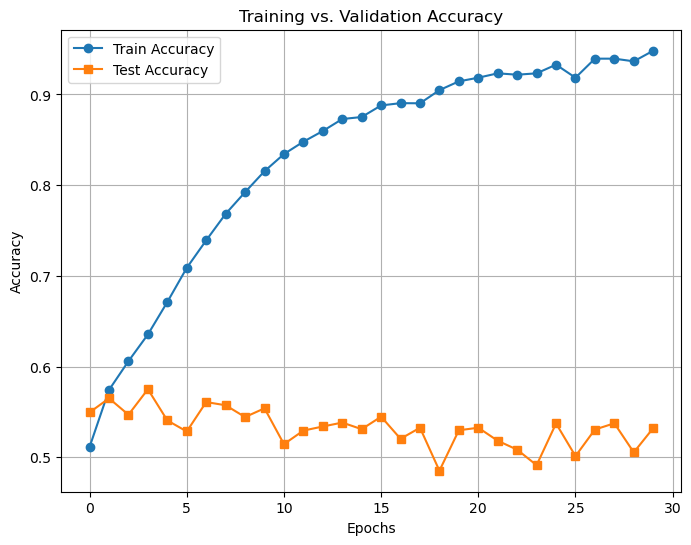

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


Epoch 1/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4427 - loss: 1.4802 - val_accuracy: 0.4627 - val_loss: 1.3929
Epoch 2/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4637 - loss: 1.3741 - val_accuracy: 0.4610 - val_loss: 1.4240
Epoch 3/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4930 - loss: 1.3116 - val_accuracy: 0.4449 - val_loss: 1.4792
Epoch 4/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5449 - loss: 1.2156 - val_accuracy: 0.4329 - val_loss: 1.6621
Epoch 5/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6028 - loss: 1.0688 - val_accuracy: 0.3299 - val_loss: 2.0110
Epoch 6/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6799 - loss: 0.8893 - val_accuracy: 0.2900 - val_loss: 2.3311
Epoch 7/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7293 - loss: 0.7625 - val_accuracy: 0.2314 - val_loss: 3.3539
Epoch 8/30
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7753 - loss: 0.6314 - val_accuracy: 0.

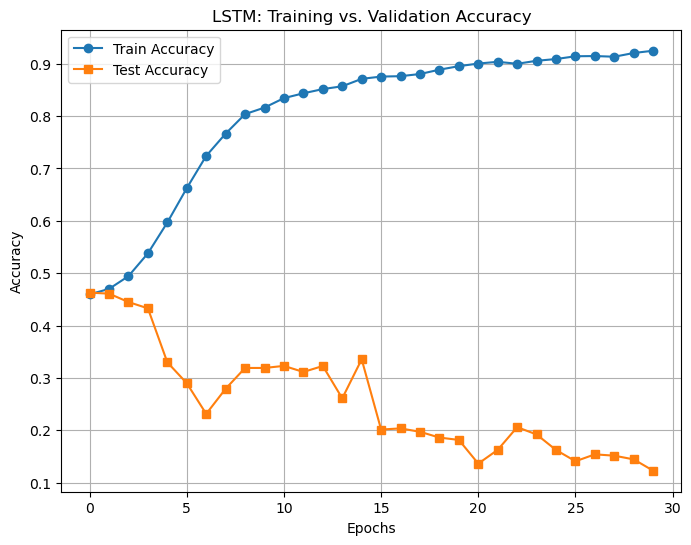

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import os

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute power spectral density (PSD) features
def extract_psd_features(eeg_epoch, fs):
    freqs, psd = scipy.signal.welch(eeg_epoch, fs=fs, nperseg=fs*2)  
    psd = np.log1p(psd)  # Log transform to avoid log(0) issues
    return psd.flatten()

X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]
        fs = data["fs"]

        # Extract PSD features for each epoch
        for i in range(eeg_epochs.shape[0]):
            features = np.array([extract_psd_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)  # Shape: (num_samples, num_channels, num_features)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(sample) for sample in X_train])
X_test = np.array([scaler.transform(sample) for sample in X_test])

# Define LSTM Model
model = Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(64),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM: Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3811 - loss: 4.0190 - val_accuracy: 0.4637 - val_loss: 2.1118
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4560 - loss: 1.9514 - val_accuracy: 0.4633 - val_loss: 1.7295
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4569 - loss: 1.5991 - val_accuracy: 0.4706 - val_loss: 1.5932
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4678 - loss: 1.4681 - val_accuracy: 0.4403 - val_loss: 1.5747
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4567 - loss: 1.4350 - val_accuracy: 0.4810 - val_loss: 1.4921
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4655 - loss: 1.4020 - val_accuracy: 0.4401 - val_loss: 1.5756
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4649 - loss: 1.3955 - val_accuracy: 0.4431 - val_loss: 1.9883
Epoch 8/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4663 - loss: 1.3908 - val_accuracy: 0.

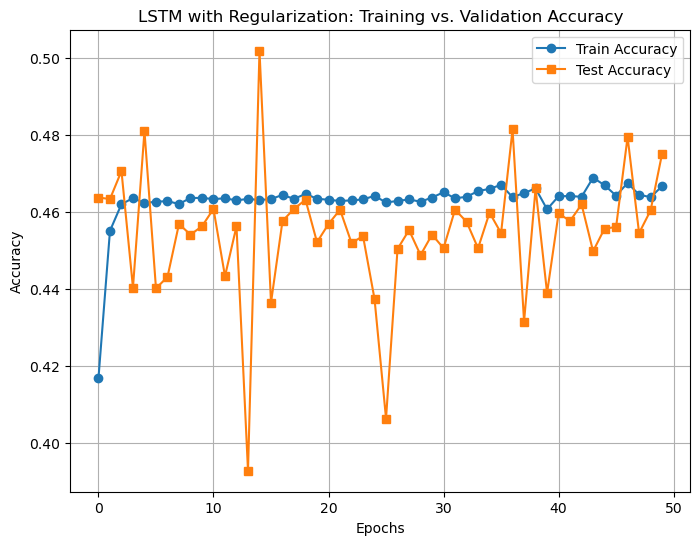

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import os

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute power spectral density (PSD) features
def extract_psd_features(eeg_epoch, fs):
    freqs, psd = scipy.signal.welch(eeg_epoch, fs=fs, nperseg=fs*2)  
    psd = np.log1p(psd)  # Log transform to avoid log(0) issues
    return psd.flatten()

X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  
        labels = data["labels"]
        fs = data["fs"]

        # Extract PSD features for each epoch
        for i in range(eeg_epochs.shape[0]):
            features = np.array([extract_psd_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(sample) for sample in X_train])
X_test = np.array([scaler.transform(sample) for sample in X_test])

# Define LSTM Model with Regularization
model = Sequential([
    layers.LSTM(64, return_sequences=True, 
                kernel_regularizer=regularizers.l2(0.01), 
                recurrent_regularizer=regularizers.l2(0.01),
                input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  
    
    layers.LSTM(32, return_sequences=False, 
                kernel_regularizer=regularizers.l2(0.01),
                recurrent_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  
    
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    
    layers.Dense(len(np.unique(y)), activation="softmax")
])

# Compile model with Gradient Clipping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM with Regularization: Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


Epoch 1/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4247 - loss: 12.2777 - val_accuracy: 0.4635 - val_loss: 1.4726
Epoch 2/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4633 - loss: 1.4606 - val_accuracy: 0.4635 - val_loss: 1.4387
Epoch 3/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4644 - loss: 1.4475 - val_accuracy: 0.4635 - val_loss: 1.4352
Epoch 4/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4643 - loss: 1.4417 - val_accuracy: 0.4635 - val_loss: 1.4347
Epoch 5/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4566 - loss: 1.4504 - val_accuracy: 0.4635 - val_loss: 1.4343
Epoch 6/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4675 - loss: 1.4362 - val_accuracy: 0.4635 - val_loss: 1.4338
Epoch 7/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4700 - loss: 1.4303 - val_accuracy: 0.4635 - val_loss: 1.4339
Epoch 8/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4611 - loss: 1.4400 - val_accuracy: 0

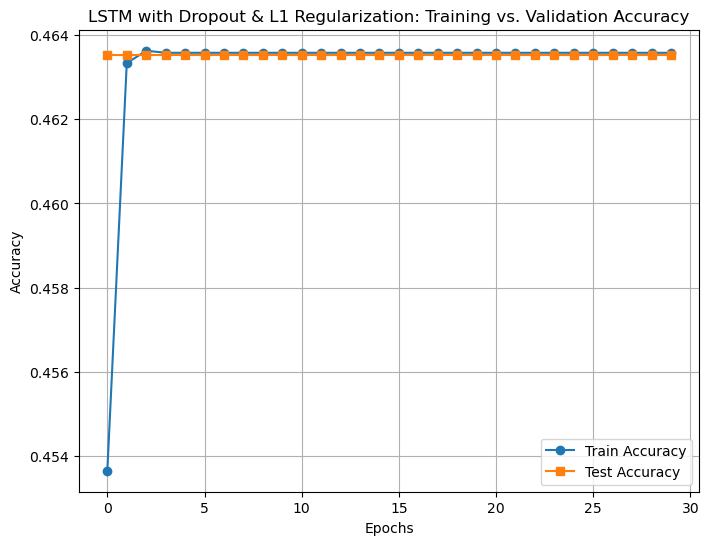

In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import os
import scipy.signal

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute power spectral density (PSD) features
def extract_psd_features(eeg_epoch, fs):
    freqs, psd = scipy.signal.welch(eeg_epoch, fs=fs, nperseg=fs*2)  
    psd = np.log1p(psd)  # Log transform to avoid log(0) issues
    return psd.flatten()

X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  
        labels = data["labels"]
        fs = data["fs"]

        # Extract PSD features for each epoch
        for i in range(eeg_epochs.shape[0]):
            features = np.array([extract_psd_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(sample) for sample in X_train])
X_test = np.array([scaler.transform(sample) for sample in X_test])

# Define LSTM Model with Dropout & L1 Regularization
model = Sequential([
    layers.LSTM(64, return_sequences=True, 
                kernel_regularizer=regularizers.l1(0.01),  # L1 regularization
                input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.3),  # Dropout for regularization
    
    layers.LSTM(32, return_sequences=False, 
                kernel_regularizer=regularizers.l1(0.01)),
    layers.Dropout(0.3),  
    
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    layers.Dropout(0.2),
    
    layers.Dense(len(np.unique(y)), activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM with Dropout & L1 Regularization: Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


Epoch 1/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2438 - loss: 4.3335 - val_accuracy: 0.4570 - val_loss: 2.6005
Epoch 2/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4324 - loss: 2.4370 - val_accuracy: 0.4700 - val_loss: 1.9362
Epoch 3/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4547 - loss: 1.8612 - val_accuracy: 0.4777 - val_loss: 1.6306
Epoch 4/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4608 - loss: 1.6033 - val_accuracy: 0.4474 - val_loss: 1.5568
Epoch 5/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4624 - loss: 1.5021 - val_accuracy: 0.4586 - val_loss: 1.4907
Epoch 6/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4604 - loss: 1.4486 - val_accuracy: 0.4629 - val_loss: 1.5359
Epoch 7/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4626 - loss: 1.4302 - val_accuracy: 0.4822 - val_loss: 1.5344
Epoch 8/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4640 - loss: 1.4191 - val_accuracy: 0.

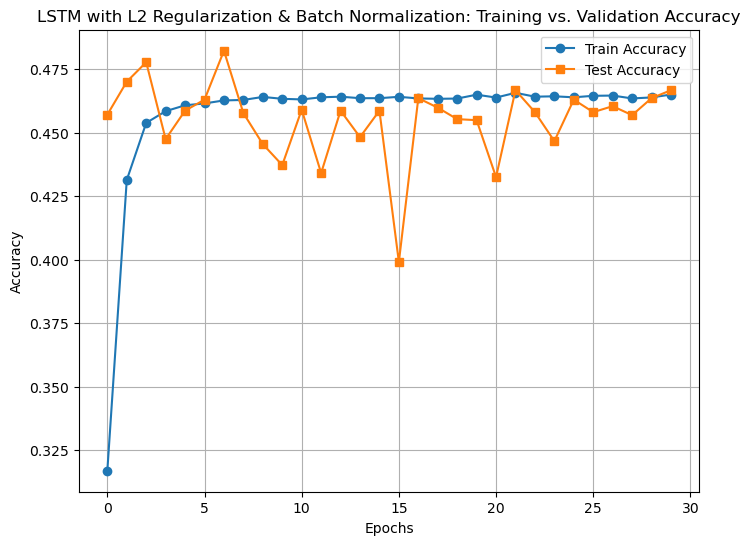

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import os
import scipy.signal

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute power spectral density (PSD) features
def extract_psd_features(eeg_epoch, fs):
    freqs, psd = scipy.signal.welch(eeg_epoch, fs=fs, nperseg=fs*2)  
    psd = np.log1p(psd)  # Log transform to avoid log(0) issues
    return psd.flatten()

X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  
        labels = data["labels"]
        fs = data["fs"]

        # Extract PSD features for each epoch
        for i in range(eeg_epochs.shape[0]):
            features = np.array([extract_psd_features(eeg_epochs[i, ch], fs) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(sample) for sample in X_train])
X_test = np.array([scaler.transform(sample) for sample in X_test])

# Define LSTM Model with L2 Regularization & Batch Normalization
model = Sequential([
    layers.LSTM(64, return_sequences=True, 
                kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.BatchNormalization(),  # Batch Normalization
    layers.Dropout(0.3),  
    
    layers.LSTM(32, return_sequences=False, 
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  
    
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(len(np.unique(y)), activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM with L2 Regularization & Batch Normalization: Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [69]:
import numpy as np
import pywt
import os
import scipy.signal
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Path to processed EEG epochs
data_folder = "processed_epochs"

# Function to compute DWT features
def extract_dwt_features(eeg_epoch, wavelet='db4', level=1):
    coeffs = pywt.wavedec(eeg_epoch, wavelet, level=level)
    features = np.concatenate([c.flatten() for c in coeffs])  # Flatten all coefficients
    return features

X = []
y = []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  
        labels = data["labels"]

        # Extract DWT features for each epoch
        for i in range(eeg_epochs.shape[0]):
            features = np.array([extract_dwt_features(eeg_epochs[i, ch]) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(sample) for sample in X_train])
X_test = np.array([scaler.transform(sample) for sample in X_test])


Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2637 - loss: 7.1486 - val_accuracy: 0.4667 - val_loss: 4.0126
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5350 - loss: 3.4555 - val_accuracy: 0.4313 - val_loss: 2.6322
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5697 - loss: 2.2894 - val_accuracy: 0.4211 - val_loss: 2.2010
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5944 - loss: 1.8824 - val_accuracy: 0.4287 - val_loss: 2.0457
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6009 - loss: 1.7543 - val_accuracy: 0.4291 - val_loss: 2.1210
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6174 - loss: 1.7446 - val_accuracy: 0.4376 - val_loss: 2.1894
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6269 - loss: 1.7426 - val_accuracy: 0.4181 - val_loss: 2.2384
Epoch 8/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6273 - loss: 1.7597 - val_accuracy

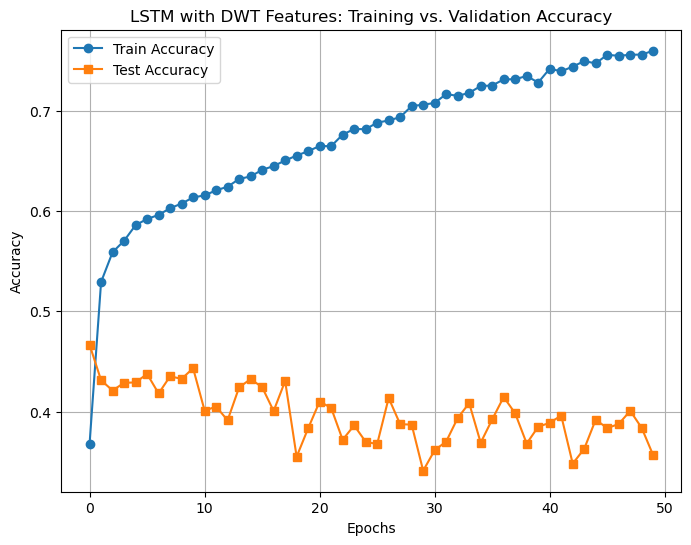

In [72]:
# Define LSTM Model with L2 Regularization & Batch Normalization
lstm_model = Sequential([
    layers.LSTM(64, return_sequences=True, 
                kernel_regularizer=regularizers.l2(0.01),  
                input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.LSTM(32, return_sequences=False, 
                kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(len(np.unique(y)), activation="softmax")
])

# Compile model
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Test Accuracy: {accuracy_lstm:.2f}")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))

# Plot Training Accuracy
plt.figure(figsize=(8, 6))
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(lstm_history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM with DWT Features: Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [76]:
import os
import numpy as np
import pywt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Function to extract DWT features
def extract_dwt_features(eeg_epoch, wavelet='db4', level=3):
    coeffs = pywt.wavedec(eeg_epoch, wavelet, level=level)  # Decompose EEG signal
    features = np.concatenate([np.ravel(c) for c in coeffs])  # Flatten coefficients
    return features

# Load and process EEG data
data_folder = "processed_epochs"
X, y = [], []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]

        for i in range(eeg_epochs.shape[0]):
            # Extract DWT features for each epoch across all channels
            features = np.hstack([extract_dwt_features(eeg_epochs[i, ch]) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights to handle imbalance
class_weights = dict(enumerate(compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)))


In [78]:
# Define MLP Model with L2 Regularization & Batch Normalization
mlp_model = tf.keras.Sequential([
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model with lower learning rate
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

# Define callbacks for adaptive learning rate
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=30, batch_size=64,
                            validation_data=(X_test, y_test),
                            class_weight=class_weights,
                            callbacks=[lr_scheduler])

# Evaluate model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Test Accuracy: {accuracy_mlp:.2f}")
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


Epoch 1/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1734 - loss: 6.7336 - val_accuracy: 0.1987 - val_loss: 5.6428 - learning_rate: 5.0000e-04
Epoch 2/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1769 - loss: 5.7737 - val_accuracy: 0.1687 - val_loss: 5.4273 - learning_rate: 5.0000e-04
Epoch 3/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1882 - loss: 5.3839 - val_accuracy: 0.1789 - val_loss: 5.1193 - learning_rate: 5.0000e-04
Epoch 4/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1979 - loss: 4.9056 - val_accuracy: 0.1577 - val_loss: 4.8316 - learning_rate: 5.0000e-04
Epoch 5/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2144 - loss: 4.7984 - val_accuracy: 0.1425 - val_loss: 4.6129 - learning_rate: 5.0000e-04
Epoch 6/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2220 - loss: 4.3208 - val_accuracy: 0.1612 - val_loss: 4.4170 - learning_rate: 5.0000e-04
Epoch 7/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 

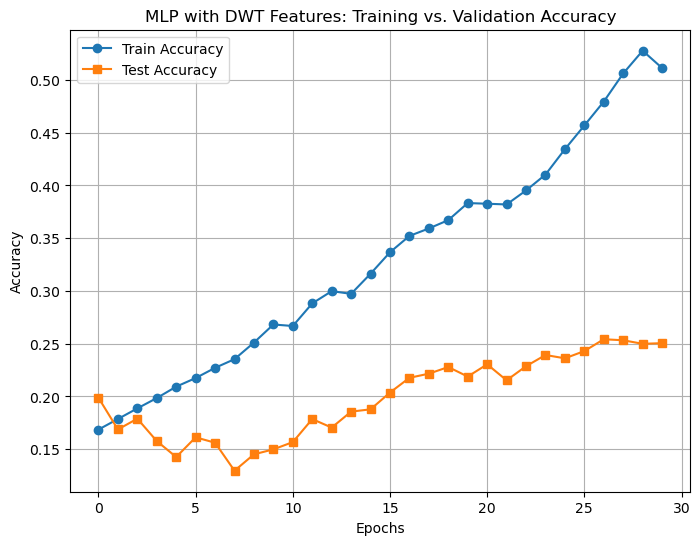

In [80]:
# Plot Training Accuracy
plt.figure(figsize=(8, 6))
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(mlp_history.history['val_accuracy'], label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP with DWT Features: Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [82]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Function to extract FFT features
def extract_fft_features(eeg_epoch):
    fft_coeffs = np.abs(np.fft.fft(eeg_epoch))  # Compute FFT magnitude
    return fft_coeffs[:len(fft_coeffs) // 2]  # Keep only first half (symmetry)

# Load and process EEG data
data_folder = "processed_epochs"
X, y = [], []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]

        for i in range(eeg_epochs.shape[0]):
            # Extract FFT features for each epoch across all channels
            features = np.hstack([extract_fft_features(eeg_epochs[i, ch]) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [84]:
# Define a simple MLP model (No regularization)
mlp_model = tf.keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Test Accuracy: {accuracy_mlp:.2f}")
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


Epoch 1/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5194 - loss: 1.3956 - val_accuracy: 0.5882 - val_loss: 1.1920
Epoch 2/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6016 - loss: 1.1413 - val_accuracy: 0.6092 - val_loss: 1.1541
Epoch 3/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6379 - loss: 1.0375 - val_accuracy: 0.5695 - val_loss: 1.1841
Epoch 4/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6597 - loss: 0.9420 - val_accuracy: 0.5752 - val_loss: 1.2532
Epoch 5/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6823 - loss: 0.8827 - val_accuracy: 0.6068 - val_loss: 1.1641
Epoch 6/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7211 - loss: 0.7746 - val_accuracy: 0.6002 - val_loss: 1.2340
Epoch 7/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7525 - loss: 0.6849 - val_accuracy: 0.5970 - val_loss: 1.3418
Epoch 8/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7766 - loss: 0.6257 - val_accuracy: 0.

In [88]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Function to extract FFT features
def extract_fft_features(eeg_epoch):
    fft_coeffs = np.abs(np.fft.fft(eeg_epoch))  # Compute FFT magnitude
    return fft_coeffs[:len(fft_coeffs) // 2]  # Keep only first half (symmetry)

# Load and process EEG data
data_folder = "processed_epochs"
X, y = [], []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]

        for i in range(eeg_epochs.shape[0]):
            # Extract FFT features for each epoch across all channels
            features = np.vstack([extract_fft_features(eeg_epochs[i, ch]) for ch in range(eeg_epochs.shape[1])]).T
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(x) for x in X_train])
X_test = np.array([scaler.transform(x) for x in X_test])

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [ ]:
# Define an LSTM model without regularization
lstm_model = tf.keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Test Accuracy: {accuracy_lstm:.2f}")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))


Epoch 1/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 201s 623ms/step - accuracy: 0.4363 - loss: 1.4858 - val_accuracy: 0.3269 - val_loss: 1.7145
Epoch 2/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 193s 607ms/step - accuracy: 0.4714 - loss: 1.3769 - val_accuracy: 0.3312 - val_loss: 1.7232
Epoch 3/30
318/318 ━━━━━━━━━━━━━━━━━━━━ 202s 636ms/step - accuracy: 0.4739 - loss: 1.3679 - val_accuracy: 0.2976 - val_loss: 1.7725
Epoch 4/30
136/318 ━━━━━━━━━━━━━━━━━━━━ 1:43 570ms/step - accuracy: 0.4609 - loss: 1.3962

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from scipy.signal import cwt, morlet

# Function to extract CWT features
def extract_cwt_features(eeg_epoch, scales=np.arange(1, 128)):
    return np.abs(cwt(eeg_epoch, morlet, scales)).flatten()  # Compute CWT magnitude

# Load and process EEG data
data_folder = "processed_epochs"
X, y = [], []

for file in os.listdir(data_folder):
    if file.endswith(".npz"):
        data = np.load(os.path.join(data_folder, file))
        eeg_epochs = data["eeg"]  # Shape: (num_epochs, num_channels, samples_per_epoch)
        labels = data["labels"]

        for i in range(eeg_epochs.shape[0]):
            # Extract CWT features for each epoch across all channels
            features = np.hstack([extract_cwt_features(eeg_epochs[i, ch]) for ch in range(eeg_epochs.shape[1])])
            X.append(features)
            y.append(labels[i])

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Handle NaN/Inf values
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaN or Inf detected in feature matrix! Replacing with zero.")
    X = np.nan_to_num(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Define MLP Model
mlp_model = tf.keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Test Accuracy: {accuracy_mlp:.2f}")
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


In [ ]:
# Reshape for LSTM (samples, timesteps, features)
timesteps = 64  # Adjust based on the number of scales used in CWT
X_train = X_train.reshape((X_train.shape[0], timesteps, -1))
X_test = X_test.reshape((X_test.shape[0], timesteps, -1))


In [ ]:
# Define LSTM Model
lstm_model = tf.keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(np.unique(y)), activation="softmax")  # Output layer (num classes)
])

# Compile model
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Test Accuracy: {accuracy_lstm:.2f}")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Model

def SleepEEGNet(input_shape, num_classes):
    
    inputs = Input(shape=input_shape)

    x = Conv1D(64, kernel_size=50, strides=6, padding='same')(inputs)
    x = tf.keras.layers.ReLU()(x)
    x = MaxPooling1D(pool_size=8, strides=8)(x)
    x = Dropout(0.25)(x)

    x = Conv1D(128, kernel_size=8, strides=1, padding='same')(x)
    x = tf.keras.layers.ReLU()(x)
    x = Conv1D(128, kernel_size=8, strides=1, padding='same')(x)
    x = tf.keras.layers.ReLU()(x)
    x = Conv1D(128, kernel_size=8, strides=1, padding='same')(x)
    x = tf.keras.layers.ReLU()(x)

    x = MaxPooling1D(pool_size=4, strides=4)(x)
    x = Dropout(0.25)(x)

    x = Bidirectional(LSTM(128, return_sequences=False))(x) #return_sequences=False to only give the last output.

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage:
if __name__ == "__main__":
    sequence_length = 3000  
    input_channels = 1 
    num_classes = 5  
    input_shape = (sequence_length, input_channels)

    model = SleepEEGNet(input_shape, num_classes)
    model.summary() # print a summary of the model.

    # Replace
    
    import numpy as np
    batch_size = 32
    example_input = np.random.rand(batch_size, sequence_length, input_channels)

   
    predictions = model.predict(example_input)
    print("Predictions shape:", predictions.shape)